<a href="https://colab.research.google.com/github/MatteusStranger/genetic_algorithm_mc906/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MC906A/MO416A - Introducition to Artificial Intelligence
## Institute of Computing - Unicamp

## Project 2 for MC906 disciplina

### Authors

- Matteus Vargas (ra: 262885)
- Christian Maekawa (ra: 231867)
- Stéfani Fernandes (ra: 147939)
- Maisa Silva (ra: 181831)
- Giovane de Morais (ra: 192683)

In [3]:
import sys
import numpy as np
from timeit import Timer
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !git clone https://github.com/MatteusStranger/genetic_algorithm_mc906.git
  %cd /content/genetic_algorithm_mc906/
  !pip install -e extra_lib/
  #sys.path.append('/content/genetic_algorithm_mc906/')
import extra_lib.metamodel as hospitalModel
import extra_lib.ag_asex as ag_asex
import extra_lib.ga as ga

Cloning into 'genetic_algorithm_mc906'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 343 (delta 14), reused 22 (delta 11), pack-reused 311
Receiving objects: 100% (343/343), 626.82 KiB | 879.00 KiB/s, done.
Resolving deltas: 100% (173/173), done.
/content/genetic_algorithm_mc906
Obtaining file:///content/genetic_algorithm_mc906/extra_lib
  Running setup.py develop for extra-lib


## The problem addressed

Find the number of employees needed to maximize the number of patients served.

## The evolutionary model adopted
There are two evolutionary model adopted... 

## Implementation specifics and restrictions

|Represetation | Decision variables                          | type    | Lower bound      | Upper bound    |
|:-------------|:-------------------------------------------:|:-------:|:----------------:|---------------:|
|x1            | Number of receptionists                     | Integer |        1         |       3        |
|x2            | Number of doctors                           | Integer |        1         |       4        |
|x3            | Number of laboratory technicians            | Integer |        1         |       5        |
|x4            | Number of nurses in the treatment room      | Integer |        1         |       6        |
|x5            | Number of nurses in the emergency room      | Integer |        1         |       12       |

### Cromossomo representation 

## Variations on parameters
- Population 2000
- Strategy sexual and asexual crossing over
- strategy to make mutation sexual use tax and asexual use median as criteria


- population 2000
- stop after 2000 generation
- selection technique : Select best group fitness function
- crossover technique : sexual use half point and asexual use rotate 2 left
- mutation technique : sexual alter value , assexual shuffle and picky next generatation randoly
- replacement method: sexual get half from each best parents assexual get last parent and rotate 2 to left
- mutation rate : sexual use 2% and assexual depends of median repetion
- crossover rate : 50% sexual, assexual rotate 2 gene so 10% until get 100% rotate



## Fitness function adopted
- Maximaze metamodel math equation generated by genetic programming $y1 = 1.113x_{2} + 0.701x_{2}x_{3} + 0.207x_{2}x_{5} + 0.021x_{1}x_{5} - 0.435x_{2}^{2} - 0.013x_{2}x_{5}^{2} - 0.092 x_{2}x_{3}^{2}$.

- Maximaze artificial netweork neural metamodel.



In [4]:
y1 = lambda x1,x2,x3,x4,x5: 1.113*x2 + 0.701*x2*x3 + 0.207*x2*x5 + 0.021*x1*x5 - \
                            0.435*x2**2 - 0.013*x2*x5**2 -0.092*x2*x3**2
mm = hospitalModel.metamodel()
mm.cuda_status()
mm.fit()

Are you using GPU? True
Tesla P100-PCIE-16GB
GPU Power(max,min)(6, 0)
Progress 100.0%, Train Loss: 0.0419 Test Loss: 0.0431


Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

## About dataset
It is about simulated hospital client server
### This data was simulated using literature reviews 
Trying to visualize correlations. We can't see correlation between variables

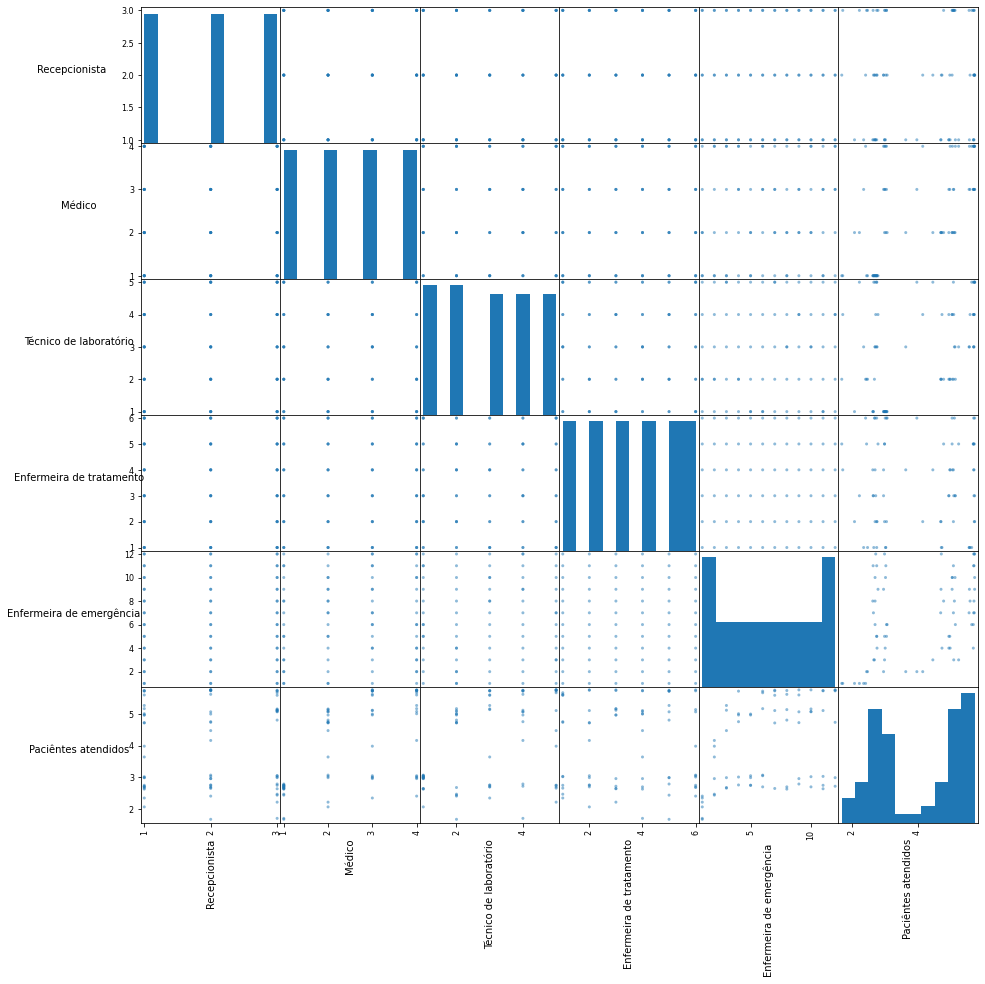

In [5]:
mm.plot_correlations()

Trying to visualize distribution. We can see some distributions are balanced others, not.

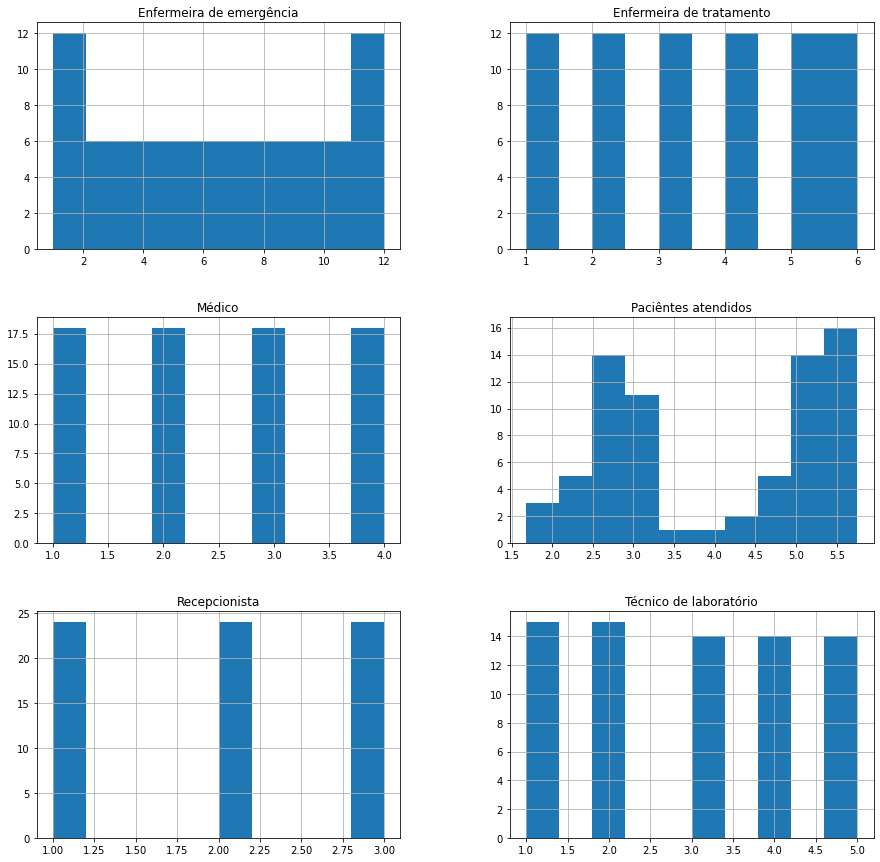

In [6]:
mm.plot_distributions()

ANN with 5 neuron and using sigmoid as activation function. This dataset converge our metamodel.

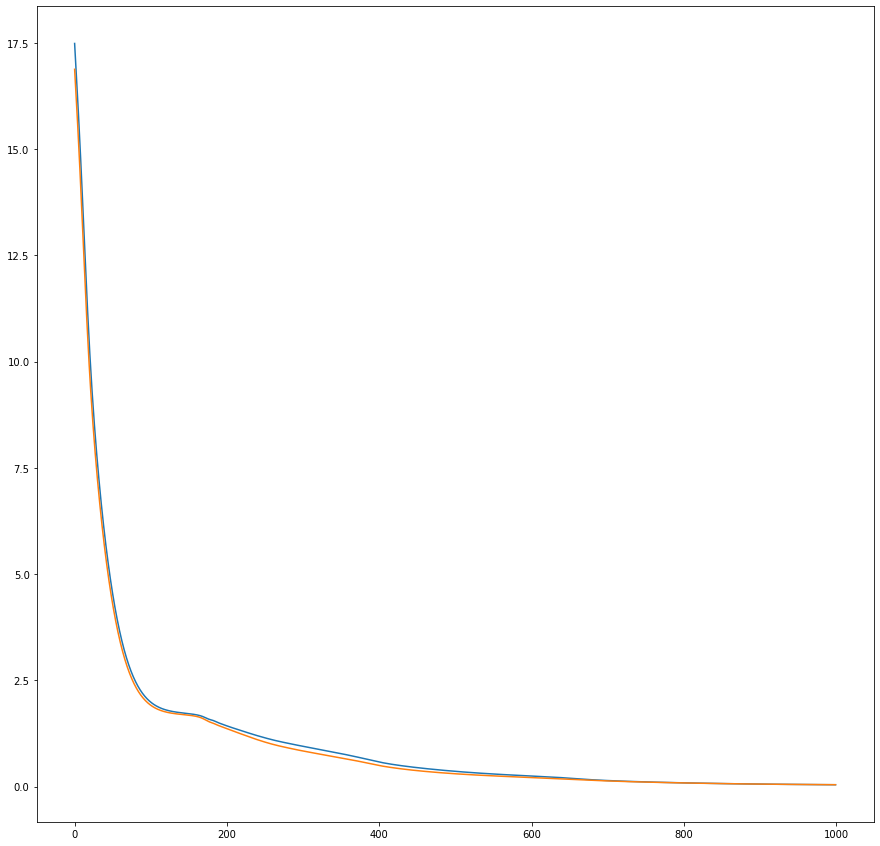

In [7]:
mm.train_performance()

## Usage

In [8]:
print("Eureqa Software (Using Genetic programming)") ## Useful to return math equation
print(y1(3,4,4,1,9))
print("ANN with 5 neuron and using sigmoid as activation function d")
s=mm.predict([3,4,4,1,9])[0][0]
print(s)
print("Real answer from simulation")
print("5.76") ## Get from literature

Eureqa Software (Using Genetic programming)
6.626999999999997
ANN with 5 neuron and using sigmoid as activation function d
5.895145
Real answer from simulation
5.76


Error between genetic programming and result is bigger than ANN. But genetic programming return a math equation. ANN we can't return math equation. ANN return weight and we can see what weight is more relevant. 

-------------------
## AG to maximize function
Code made from team to optimize eureqa equantion and ANN.

* Goal is found input to maximize our model. 

População inicial [[2, 2, 4, 2, 8], [1, 2, 5, 4, 12], [2, 4, 3, 6, 4], [3, 4, 5, 5, 12]]

Melhor resultado : [[5.9211946]]

Melhor cromossomo: [3, 4, 5, 2, 11]



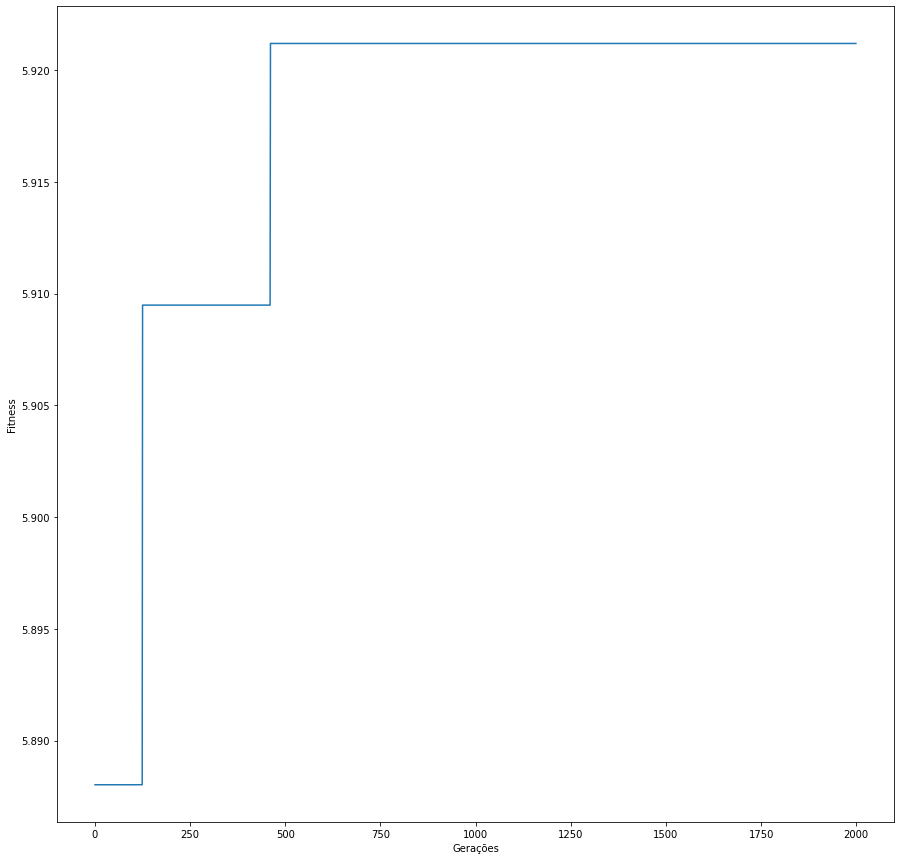

Monitoramos o uso de memória e cpu durante as gerações. Gostaria de ver os resultos em gráfico?

1 - Sim
0 - Nao

1


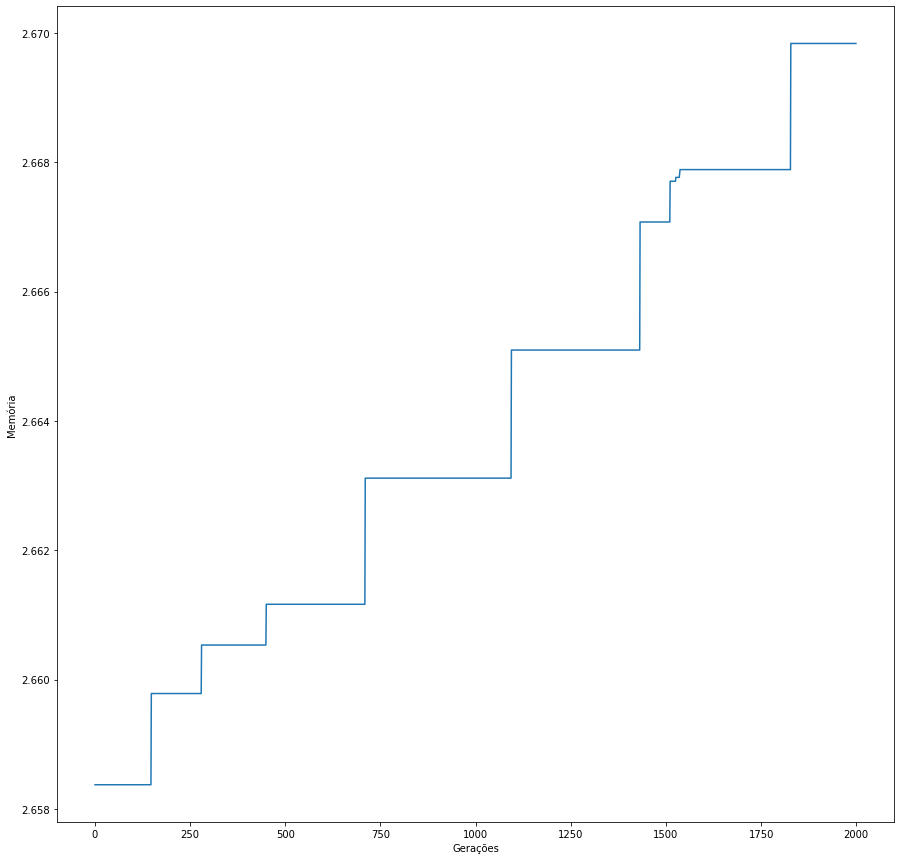

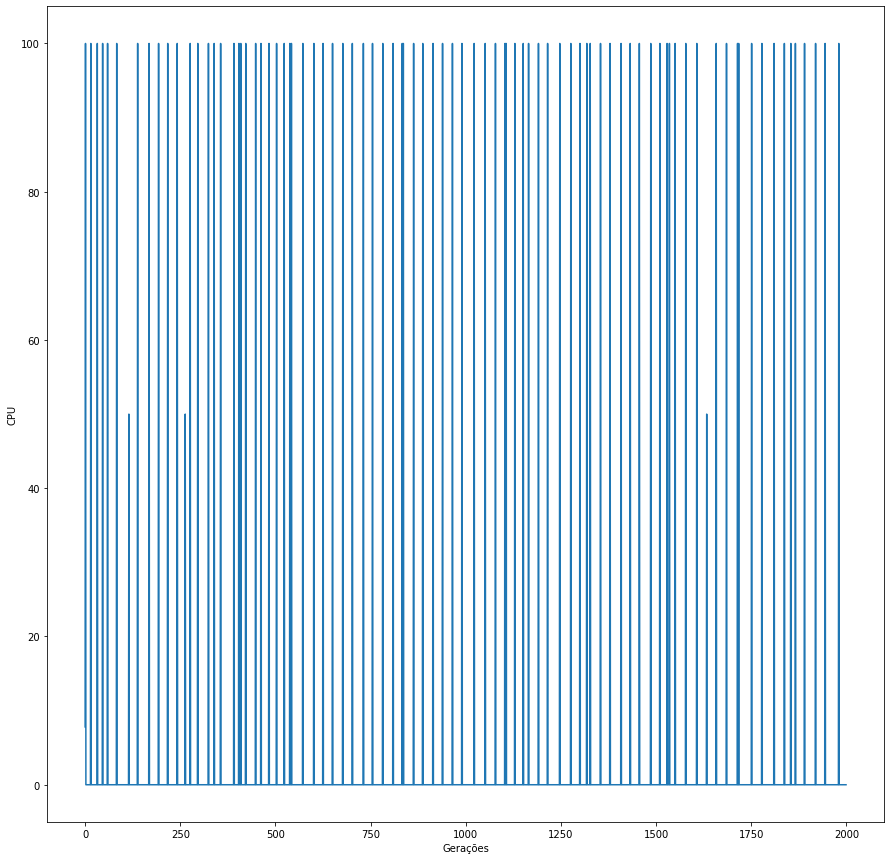

Tempo gasto para executar a reprodução sexuada 8.4131s


In [10]:
## Sexual
ga.setModel(mm)
# ga.execucao()

t = Timer(lambda: ga.execucao())
tempo = t.timeit(number=1)
print(f"Tempo gasto para executar a reprodução sexuada {tempo:0.4f}s")

Progress 100.0%, Train Loss: 0.1187 Test Loss: 0.1237
Best value: 5.6847333908081055 best cromosome [0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1] best combination of variables [2, 3, 4, 4, 6]


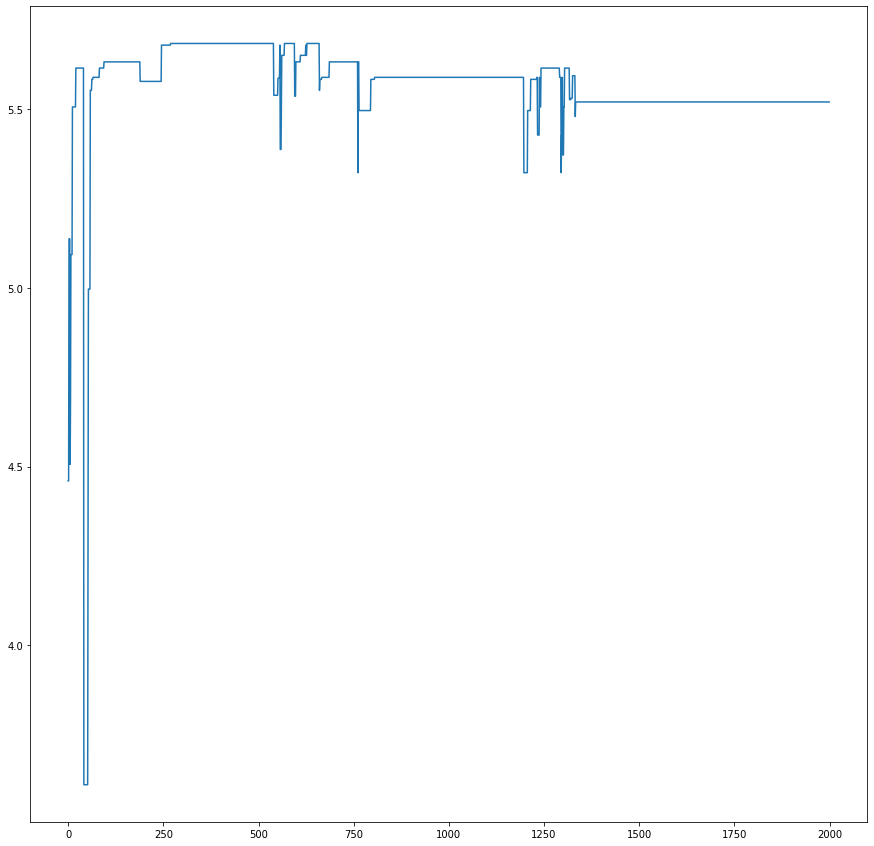

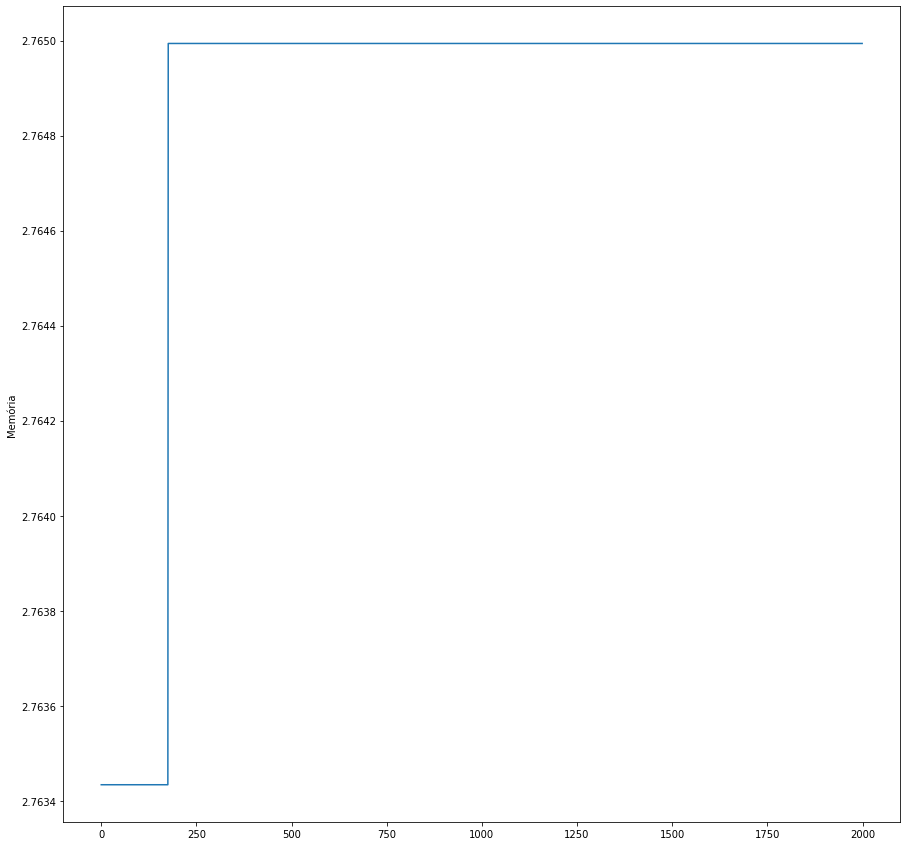

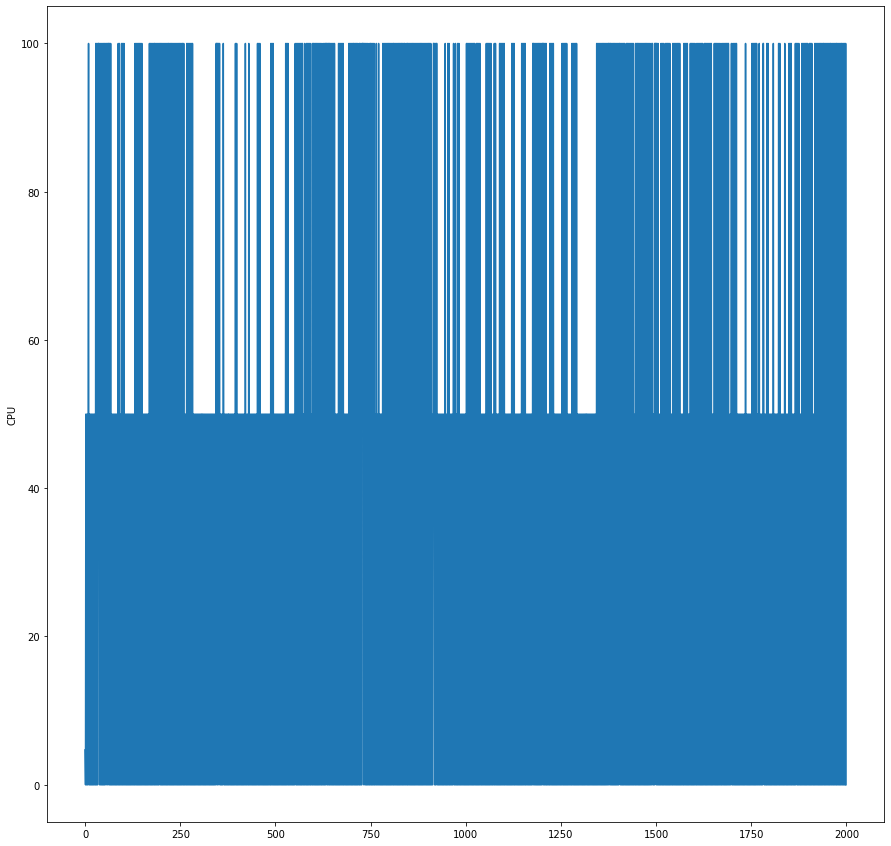

Tempo gasto para executar a reprodução asexuada 7.8567s


In [13]:
## Assexual
ag1 = ag_asex.ag_asex()
ag1.setModel(mm)
t = Timer(lambda: ag1.agOptim(ag1.fm, with_plot=True))
tempo = t.timeit(number=1)
print(f"Tempo gasto para executar a reprodução asexuada {tempo:0.4f}s")